<a href="https://colab.research.google.com/github/TeraneAgaeva/Grocery-store-sales-analysis/blob/main/%22Grocery_store_sales_analysis_ENG_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grocery sales analysis (python + Tableau)

## Working with an Excel File

This notebook will be dedicated to analyzing data from the file [Grocery DataBase.xlsx](https://docs.google.com/spreadsheets/d/1zeHP2Ihiw0KAfwWL3-h1HCPNgGKrTmX4/edit?gid=872187135#gid=872187135). Yes, it's an Excel file, and we can easily load data from it into Python.

**Task:** We are analyzing the Grocery sales database to identify valuable insights that can be leveraged for the development of this business.

To begin, let's install the library needed for working with Excel files in pandas. You can install it here or in the terminal, but if you install it in the terminal, you'll need to restart the notebook kernel afterward to ensure the library is correctly loaded. Sometimes it works without restarting, but this is what to do if the compiler indicates that the library is not found.

In [1]:
!pip install openpyxl

Loading all the libraries necessary for working with the data:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.stats.api as sms
from math import ceil
%matplotlib inline
from scipy.stats import norm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.weightstats import ztest

Connecting to Google Drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Successfully connected to the file after renaming it—removing the space in the title.

!ls drive/MyDrive/Grocery_Database.xlsx

drive/MyDrive/Grocery_Database.xlsx


Here's how we can view the sheets in an Excel file:

In [5]:
# Replace with the path to the file on your computer.
path_to_file = 'drive/MyDrive/Grocery_Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

# **1. Initial Analysis of Input Data and Data Preparation**

Let's read the sheet with the description of the database fields:

In [7]:
descr1 = xl.parse('Fact Summary')

descr1

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [8]:
descr2 = xl.parse('Grosto DB')

descr2

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


Data can also be read with Pandas, but it doesn't allow viewing the available sheets, and reading the data takes longer.

In [9]:
df = pd.read_excel(path_to_file)

In [10]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [11]:
df.shape

print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


The dataset contains 50447 rows and 32 columns.


The dataset is small. We can view and analyze it in Excel, Access, Python, or SQL. We will continue the analysis in Python.

1.Let's perform a check for duplicate records:

In [12]:
df[df.duplicated()]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


If duplicates are found, we need to further analyze the records that contain duplicates:

In [13]:
df[df['Receipt Number'] == "GSB00094"]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


For further analysis, we remove one of the duplicate rows and update the index order in the dataset.

In [14]:
df = df.drop(index = 32664).reset_index(drop=True)

We analyze whether the removal was successful:

In [15]:
df[df['Receipt Number'] == "GSB00094"]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


2. Let's check for missing values:

In [16]:
df.isnull().sum()

,0
Receipt Number,0
Date,0
Year,0
Month,0
Time,0
Mobile Number,0
Membership ID,0
Loyalty Card Points,0
Age,0
Gender,0


3. Analyze the data by their types:

In [17]:
df.dtypes

,0
Receipt Number,object
Date,datetime64[ns]
Year,int64
Month,int64
Time,object
Mobile Number,int64
Membership ID,object
Loyalty Card Points,int64
Age,int64
Gender,object


4. General information about the table:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50446 entries, 0 to 50445
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50446 non-null  object        
 1   Date                 50446 non-null  datetime64[ns]
 2   Year                 50446 non-null  int64         
 3   Month                50446 non-null  int64         
 4   Time                 50446 non-null  object        
 5   Mobile Number        50446 non-null  int64         
 6   Membership ID        50446 non-null  object        
 7   Loyalty Card Points  50446 non-null  int64         
 8   Age                  50446 non-null  int64         
 9   Gender               50446 non-null  object        
 10  City                 50446 non-null  object        
 11  Country              50446 non-null  object        
 12  Category             50446 non-null  object        
 13  Sub_Category         50446 non-

5. To facilitate data analysis, I decided to make a copy of the database and work with the copy, so that I can easily revert to the original data at any time, considering that the original dataset is small. Any necessary changes to the original database will be discussed with the sales department.

In [19]:
df1 = df.copy()

6. For some fields, it makes sense to round to 2 decimal places. For example, Profit Margin, Operating Cost, and Product Cost are more readable visually with fewer decimal places.

Let's check the sum of Profit Margin, Operating Cost, and Product Cost for further analysis before rounding:

In [20]:
print(df['Profit Margin'].sum(), df['Operating Cost'].sum(), df['Product Cost'].sum())

60620.85273 87113.84249999998 433024.25477


We will round the data and save the rounded values in the df dataset:

In [21]:
df1['Profit Margin'] = df1['Profit Margin'].round(2)
df1['Operating Cost'] = df1['Operating Cost'].round(2)
df1['Product Cost'] = df1['Product Cost'].round(2)

Let's check the sum of Profit Margin, Operating Cost, and Product Cost for further analysis after rounding:

In [22]:
print(df1['Profit Margin'].sum(), df1['Operating Cost'].sum(), df1['Product Cost'].sum())

60619.1 87107.61999999998 433018.79


We see that the sum values still show more than 2 decimal places. Since all values are rounded to 2 decimal places, the issue is likely with the computer's display of data. To ensure consistent visual representation of rounding for all numeric fields without altering the data, you can use the following code:
with pd.option_context("display.precision", 2):
  print(df)

7. Issue with adding the Description field to the pivot table. Let's analyze the field names:



In [23]:
print(df1.columns)


Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')


We see that the field name 'Description ' has a trailing space. Let's remove the space from the field name:

In [24]:
df1.rename(columns={'Description ': 'Description'}, inplace=True)


It's better to check all field names for spaces and remove any leading or trailing spaces from the names.

In [25]:
df1.columns = df1.columns.str.strip()


For convenience, you can replace spaces between words in column names with underscores using the following code:

`df.columns = df.columns.str.lower().str.replace(' ', '_')`

# **2. Checking Calculated Fields**

Let's check the calculations in the fields: Gross Bill Amount, Net Bill Amount, and Amount.

We'll check the calculation in the Amount field by creating temporary fields Amount1 and Amount_check:

In [26]:
df1['Amount1'] = (df1['Price'].round(2) - (df1['Price'].round(2) * df1['DISC'].round(2))) * df1['QTY'].round(2)
df1['Amount_check'] = df1['Amount1'].round(2) - df1['Amount'].round(2)
df1['Amount_check'].sum()

# Conclusion:

if df1['Amount_check'].sum() == 0:
    print("Conclusion: The data is correctly calculated in the Amount field.")
elif abs(df1['Amount_check'].sum()) > 10:
    print(f"Conclusion: The data is incorrect in the Amount field, there is an error. A deeper analysis is needed - discuss with the sales department. The total difference is {df1['Amount_check'].sum().round(2)} in the field.")
else:
    print(f"Conclusion: The total deviation of up to $10 is not significant. The data is correctly calculated in the Amount field. The total difference is {df1['Amount_check'].sum().round(2)} in the field.")


Conclusion: The total deviation of up to $10 is not significant. The data is correctly calculated in the Amount field. The total difference is 0.91 in the field.


We'll check the calculation in the Gross Bill Amount field by creating temporary fields GrossBillAmount1 and GrossBillAmount_check:

In [27]:
df1['GrossBillAmount1'] = df1['Net Bill Amount'] + df1['Net Bill Amount'] * df1['GST']
df1['GrossBillAmount_check'] = df1['GrossBillAmount1'].round(2) - df1['Gross Bill Amount'].round(2)
df1['GrossBillAmount_check'].sum()

# Conclusion:

if df1['GrossBillAmount_check'].sum() == 0:
    print("Conclusion: The data is correctly calculated in the Gross Bill Amount field.")
elif abs(df1['GrossBillAmount_check'].sum()) > 10:
    print(f"Conclusion: The data is incorrect in the Gross Bill Amount field, there is an error. A deeper analysis is needed - discuss with the sales department. The total difference is {df1['GrossBillAmount_check'].sum().round(2)} in the field.")
else:
    print(f"Conclusion: The total deviation of up to $10 is not significant. The data is correctly calculated in the Gross Bill Amount field. The total difference is {df1['GrossBillAmount_check'].sum().round(2)} in the field.")


Conclusion: The data is correctly calculated in the Gross Bill Amount field.


Here's the code to check the calculation in the Net Bill Amount field:

In [28]:
df1['NetBillAmount1'] = df1.groupby(['Receipt Number'])['Amount'].transform('sum')
df1['NetBillAmount_check'] = df1['NetBillAmount1'] - df1['Net Bill Amount']
df1['NetBillAmount_check'].sum()

# Conclusion:

if df1['NetBillAmount_check'].sum() == 0:
    print("Conclusion: The data is correctly calculated in the Net Bill Amount field.")
elif abs(df1['NetBillAmount_check'].sum()) > 10:
    print(f"Conclusion: The data is incorrect in the Net Bill Amount field, there is an error. A deeper analysis is needed - discuss with the sales department. The total difference is {df1['NetBillAmount_check'].sum().round(2)} in the field.")
else:
    print(f"Conclusion: The total deviation of up to $10 is not significant. The data is correctly calculated in the Net Bill Amount field. The total difference is {df1['NetBillAmount_check'].sum().round(2)} in the field.")


Conclusion: The data is incorrect in the Net Bill Amount field, there is an error. A deeper analysis is needed - discuss with the sales department. The total difference is -140063.89 in the field.



CONCLUSION: An error has been found in the data. The Net Bill Amount and Gross Bill Amount fields cannot be used in further analysis. Temporarily, use the NetBillAmount1 and GrossBillAmount2 fields (calculated from NetBillAmount1). Errors found need to be discussed with the sales department.

To calculate the GrossBillAmount2 field, which is based on the NetBillAmount1 field, use the following formula:

In [29]:
df1['GrossBillAmount2'] = df1['NetBillAmount1'] + df1['NetBillAmount1'] * df1['GST']

# **QUESTIONS REGARDING BUSINESS ANALYSIS**

### **1. Question:** Let's examine Profit Margin, Operating Cost, and Product Cost by countries and cities. Where is the profit higher, and where are the expenses greater?



To build a pivot table for analyzing Profit Margin, Operating Cost, and Product Cost by countries and cities, you can use the following code:

In [30]:
pivot_table = df1.groupby(['Country', 'City'])[['Profit Margin', 'Product Cost', 'Operating Cost']].sum().sort_values(by='Profit Margin', ascending=False)

pivot_table



,,Profit Margin,Product Cost,Operating Cost
Country,City,,,
Singapore,Bedok,14648.65,104194.33,20970.82
Philippines,Manila,14454.95,102923.02,20713.01
Malaysia,Kuala Lumpur,12957.65,93247.36,18741.19
Indonesia,Jakarta,11068.78,79213.45,15930.90
Singapore,Woodlands,7489.07,53440.63,10751.70


Create the visualization:

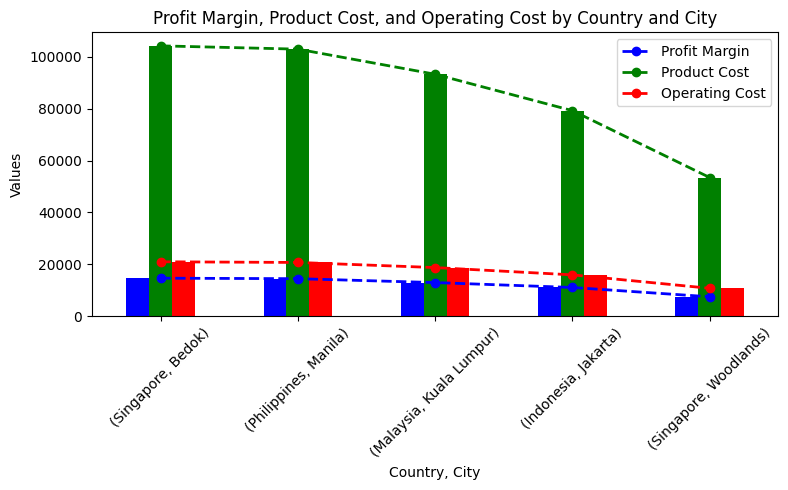

In [31]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart for all metrics
pivot_table[['Profit Margin', 'Product Cost', 'Operating Cost']].plot(kind='bar', ax=ax, color=['blue', 'green', 'red'])  # ax = ax allows for plotting on the same axis

# Add lines for each metric
pivot_table[['Profit Margin', 'Product Cost', 'Operating Cost']].plot(kind='line', ax=ax, color=['blue', 'green', 'red'], linewidth=2, marker='o', linestyle='--')

# Customize the plot
ax.set_title('Profit Margin, Product Cost, and Operating Cost by Country and City')
ax.set_xlabel('Country, City')
ax.set_ylabel('Values')
ax.legend(['Profit Margin', 'Product Cost', 'Operating Cost'])

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()  # For better layout and to prevent overlapping
plt.show()


In [32]:
max_profit_city = pivot_table['Profit Margin'].idxmax()

print(f"The branch with the highest profit is located in: {max_profit_city}")

The branch with the highest profit is located in: ('Singapore', 'Bedok')


In [33]:
min_profit_city = pivot_table['Profit Margin'].idxmin()

print(f"The branch with the lowest profit is located in: {min_profit_city}")


The branch with the lowest profit is located in: ('Singapore', 'Woodlands')


**CONCLUSION 1:** We see that the company operates in 5 countries, with one city represented in each country except Singapore, which has 2 cities. Analyzing by countries, we find that the highest profit margin is in Singapore, specifically in the city of Bedok. However, expenses are also higher in this country and city. We can also say that operating costs and product cost correspond to the dynamics of profit margin. In Bedok, the highest profit margin is accompanied by the highest expenses, whereas Woodlands has the lowest expenses compared to other cities. The visual representation confirms this trend. In my opinion, further investigation into the profitability of Woodlands is needed, as it is a large city in Singapore, a tourist country—there might be opportunities to increase the profit margin.

**2. Question:** What is the ratio of profit margin to expenses for each city?

In [34]:
pivot_table['ProfitMargin_to_ProdCost'] = (pivot_table['Profit Margin']/pivot_table['Product Cost']).round(4)
pivot_table['ProfitMargin_to_OpCost'] = (pivot_table['Profit Margin']/pivot_table['Operating Cost']).round(4)
pivot_table

,,Profit Margin,Product Cost,Operating Cost,ProfitMargin_to_ProdCost,ProfitMargin_to_OpCost
Country,City,,,,,
Singapore,Bedok,14648.65,104194.33,20970.82,0.1406,0.6985
Philippines,Manila,14454.95,102923.02,20713.01,0.1404,0.6979
Malaysia,Kuala Lumpur,12957.65,93247.36,18741.19,0.1390,0.6914
Indonesia,Jakarta,11068.78,79213.45,15930.90,0.1397,0.6948
Singapore,Woodlands,7489.07,53440.63,10751.70,0.1401,0.6965


Create the visualization:

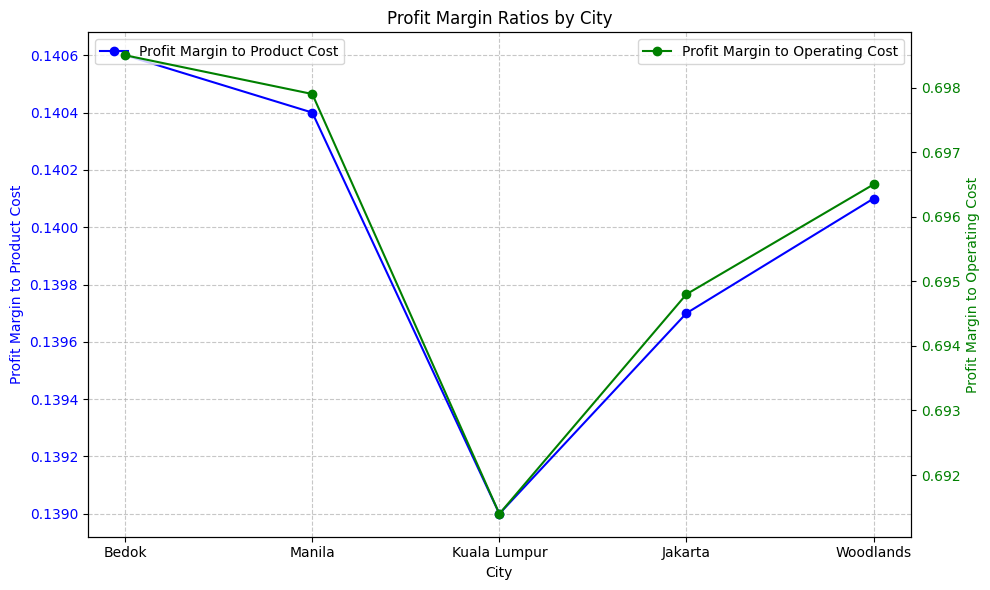

In [35]:
# Reset index to use 'City' as a field
pivot_table = pivot_table.reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Add the first line and first Y-axis
ax1.plot(pivot_table['City'], pivot_table['ProfitMargin_to_ProdCost'], marker='o', label='Profit Margin to Product Cost', color='blue')
ax1.set_xlabel('City')
ax1.set_ylabel('Profit Margin to Product Cost', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second Y-axis sharing the same X-axis
ax2 = ax1.twinx()
ax2.plot(pivot_table['City'], pivot_table['ProfitMargin_to_OpCost'], marker='o', label='Profit Margin to Operating Cost', color='green')
ax2.set_ylabel('Profit Margin to Operating Cost', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the plot
ax1.set_title('Profit Margin Ratios by City')
ax1.grid(True, linestyle='--', alpha=0.7)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate X-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**CONCLUSION 2:** The percentage of margin to expenses is lowest in Kuala Lumpur and Jakarta, meaning that in these cities, more expenses are required to achieve the same margin compared to other cities. This applies to both operating expenses and product cost. Therefore, a detailed analysis of expenses and product cost is needed to determine if there is an opportunity to reduce the percentage of expenses relative to the margin.

**3. Question:** In which country is the tax rate the lowest and in which country is it the highest? How does this affect the sales amount and profit margin?

Creating a pivot table:

In [36]:
pivot_table1 = df1.pivot_table(values=['Profit Margin', 'Amount',], index=['GST', 'Country'], aggfunc='sum').sort_values(by='Profit Margin', ascending=False).round(2)

pivot_table1

,,Amount,Profit Margin
GST,Country,,
0.07,Singapore,205165.79,22137.72
0.12,Philippines,133987.50,14454.95
0.06,Malaysia,121219.35,12957.65
0.10,Indonesia,103013.60,11068.78


**CONCLUSION 3:** As seen in the pivot table, the highest profit margin and sales are in Singapore, where the tax is not the lowest but sufficiently low. In contrast, Indonesia has the lowest sales and profit, though the tax in this country is not the highest. The maximum tax is in the Philippines, and the minimum tax is in Malaysia, but sales and profit in these countries are average. Therefore, the tax rate does not significantly impact sales and profit.

**4. Question:** Does the time of purchase affect the volume of purchases?

Creating a full date and time parameter:

In [37]:
df1['Date_time'] = df1['Date'].astype(str) + ' ' + df1['Time'].astype(str)


Changing the date and time format:

In [38]:
def parse_datetime(value):
    for fmt in ('%Y-%m-%d %H:%M:%S.%f', '%Y-%m-%d %H:%M:%S'):
        try:
            return pd.to_datetime(value, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

df1['Date_time'] = df1['Date_time'].apply(parse_datetime)

Creating a separate field for hours:

In [39]:
df1["Hour"] = df1["Date_time"].dt.hour

Calculating correlation:


In [40]:
pearson_correlation = np.corrcoef(df1['Hour'], df1['QTY'])[0, 1]
pearson_correlation

0.00957119375392019

Let's dive deeper into time ranges. Function to determine the time of day:

In [41]:
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Apply the function to each value in the Hour column
df1['Time_of_Day'] = df1['Hour'].apply(get_time_of_day)

Creating a pivot table:

In [42]:
pivot_table2 = df1.pivot_table(values='Amount', index=['Time_of_Day'], aggfunc='sum').sort_values(by='Amount', ascending=False).round(2)

pivot_table2

,Amount
Time_of_Day,
afternoon,280418.35
evening,191973.65
morning,90994.24


For better visualization, create a pie chart:

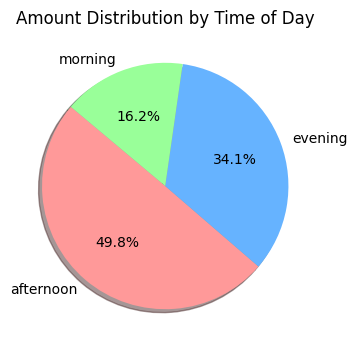

In [43]:
pivot_table2.plot.pie(y='Amount', labels=pivot_table2.index, colors=['#ff9999', '#66b3ff', '#99ff99'],
                      autopct='%1.1f%%', shadow=True, startangle=140,
                      legend=False, figsize=(4, 4))

plt.title('Amount Distribution by Time of Day')
plt.ylabel('')  # Remove Y-axis label
plt.show()

**CONCLUSION 4:** The Pearson correlation coefficient
𝑟
=
0.009571
 is close to zero, indicating an extremely weak linear relationship between the variables 'Hour' and 'QTY'. However, the highest volume of purchases occurs during the day (as seen from the pivot table and the pie chart), suggesting that operating 24-hour stores may not be necessary. It would be worthwhile to conduct a more detailed hourly analysis.

**5. Question:** Is there a reason to extend the store operating hours? How would it affect profitability?

Creating a pivot table:

In [44]:
pivot_table3 = df1.pivot_table(values=['Amount', 'Profit Margin'], index=['Hour'], aggfunc='sum').sort_values(by='Amount', ascending=False).round(2)

pivot_table3

,Amount,Profit Margin
Hour,,
20,49494.13,5308.18
13,48552.23,5270.74
21,48364.87,5253.26
18,47916.29,5081.85
15,47914.63,5094.32
17,46707.24,5043.11
12,46220.94,4984.29
19,46198.36,4944.76
10,46080.20,4981.70


Average margin for 1 year with 12-hour store operations:

In [45]:
Year_Profit_Margin = pivot_table3['Profit Margin'].sum() / 4
Year_Profit_Margin

15154.774999999998

Additional possible annual margin with extended store hours by 3 hours:

In [46]:
Additional_Profit_Margin = (pivot_table3['Profit Margin'].sum() / 4 / 12) * 3
Additional_Profit_Margin

3788.6937499999995

Margin growth per year

In [47]:
Inc_Profit_Margin = Additional_Profit_Margin/Year_Profit_Margin
Inc_Profit_Margin

0.25

Forecasting increased store hours and expected margin:

In [48]:
# Input data
alpha = 0.05
hours_original = df1['Hour']
margin_original = df1['Profit Margin']

# Generating expected increase for 3 extra hours per day and a 25% increase in margin
hours_increased = hours_original + (3 * 365 * 4)
margin_increased = margin_original * (1 + Inc_Profit_Margin)

# Calculating mean and standard deviation for original data
mean_original = np.mean(margin_original)
std_original = np.std(margin_original, ddof=1)  # ddof=1 for sample standard deviation

# Performing z-test for hypothesis testing

# Testing the increase in margin by 25%
z_stat, p_value = ztest(margin_increased, value=mean_original, alternative='larger')

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: 50.7521073815923, P-value: 0.0


Conclusion:

In [49]:
if p_value < alpha:
    print("Reject the null hypothesis. There is statistically significant evidence that increasing store hours by 3 hours will result in a 25% increase in margin.")
else:
    print("Cannot reject the null hypothesis. The data do not support that increasing store hours by 3 hours will ensure a 25% increase in margin.")


Reject the null hypothesis. There is statistically significant evidence that increasing store hours by 3 hours will result in a 25% increase in margin.


**CONCLUSION 5:** According to the analysis, it is advisable to extend store operating hours by 3 hours. Increasing store hours by 3 hours is expected to increase the margin by 25%. This is due to the fact that stores operate in tourist cities, some of which have airports. However, there are other factors beyond increasing operating hours that may impact the margin. The analysis should consider the overall picture. Increasing operating hours may also increase costs (e.g., staff, electricity).

**Question 6:** Which product category is the most prioritized?

Calculate the total profit based on 'Profit Margin':

In [50]:
total_profit_margin = df1['Profit Margin'].sum()

Create a summary table sorted by 'Profit Margin' in descending order:

In [51]:
pivot_table4 = df1.groupby(['Category'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by='Profit Margin', ascending=False).reset_index()

Add a column for % margin for each category:

In [52]:
pivot_table4['Cumulative Profit Margin'] = pivot_table4['Profit Margin'].cumsum() / total_profit_margin
pivot_table4

,Category,Profit Margin,Product Cost,Amount,QTY,Cumulative Profit Margin
0,Frozen,9262.12,55844.03,74296.7194,9907,0.152792
1,Beauty,7990.07,61380.87,79185.5923,8089,0.284600
2,Bakery & Breakfast,6224.32,40354.37,53162.5921,10526,0.387279
3,Pet Care,4460.11,26801.97,35699.7611,5272,0.460855
4,Fruit & Vegetable,4387.40,27844.90,36783.0941,6815,0.533232
5,Mother & Baby,4261.56,27754.71,36549.9824,3154,0.603532
6,Meat & Seafood,4166.65,30011.58,38975.0958,3369,0.672267
7,"Wines, Beers & Spirits",3655.00,26715.04,34641.1768,2656,0.732562
8,"Choco, Snacks, Sweets",2956.73,19865.64,26060.0847,4652,0.781337
9,"Dairy, Chilled & Eggs",2668.36,28391.89,35460.4534,5292,0.825356


Determine categories contributing to 10% of the total Profit Margin:

In [53]:
categories_10_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.1]

print(categories_10_percent)


Empty DataFrame
Columns: [Category, Profit Margin, Product Cost, Amount, QTY, Cumulative Profit Margin]
Index: []


Determine categories contributing to 20% of the total Profit Margin:

In [54]:
categories_20_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.2]

print(categories_20_percent)


  Category  Profit Margin  Product Cost      Amount   QTY  \
0   Frozen        9262.12      55844.03  74296.7194  9907   

   Cumulative Profit Margin  
0                  0.152792  


Determine categories contributing to 50% of the total Profit Margin:

In [55]:
categories_50_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.5]

print(categories_50_percent)

             Category  Profit Margin  Product Cost      Amount    QTY  \
0              Frozen        9262.12      55844.03  74296.7194   9907   
1              Beauty        7990.07      61380.87  79185.5923   8089   
2  Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3            Pet Care        4460.11      26801.97  35699.7611   5272   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  


Determine categories contributing to 80% of the total Profit Margin:

In [56]:
categories_80_percent = pivot_table4[pivot_table4['Cumulative Profit Margin'] <= 0.8]

print(categories_80_percent)

                 Category  Profit Margin  Product Cost      Amount    QTY  \
0                  Frozen        9262.12      55844.03  74296.7194   9907   
1                  Beauty        7990.07      61380.87  79185.5923   8089   
2      Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3                Pet Care        4460.11      26801.97  35699.7611   5272   
4       Fruit & Vegetable        4387.40      27844.90  36783.0941   6815   
5           Mother & Baby        4261.56      27754.71  36549.9824   3154   
6          Meat & Seafood        4166.65      30011.58  38975.0958   3369   
7  Wines, Beers & Spirits        3655.00      26715.04  34641.1768   2656   
8   Choco, Snacks, Sweets        2956.73      19865.64  26060.0847   4652   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  
4                  0.533232  
5                  0.603532  
6                  

  The sum of the margin on priority product categories that provide 80% of the profit:

In [57]:
total_sum_cat_80_percent = categories_80_percent['Profit Margin'].sum()

The total sum of the margin:

In [58]:
total_sum_margin = df1['Profit Margin'].sum()

Results:

In [59]:
print(total_sum_cat_80_percent, total_sum_margin, total_sum_cat_80_percent/total_sum_margin)

47363.96000000001 60619.1 0.7813372352938267


Calculate the 50% percentile for the 'Profit Margin' field:

In [60]:
quantile_profit_margin = pivot_table4['Profit Margin'].quantile(0.5)

Filter categories contributing to 50% of the total revenue:

In [61]:
categories_50_percentl = pivot_table4[pivot_table4['Profit Margin'] >= quantile_profit_margin]

# Display results
print(categories_50_percentl)


                 Category  Profit Margin  Product Cost      Amount    QTY  \
0                  Frozen        9262.12      55844.03  74296.7194   9907   
1                  Beauty        7990.07      61380.87  79185.5923   8089   
2      Bakery & Breakfast        6224.32      40354.37  53162.5921  10526   
3                Pet Care        4460.11      26801.97  35699.7611   5272   
4       Fruit & Vegetable        4387.40      27844.90  36783.0941   6815   
5           Mother & Baby        4261.56      27754.71  36549.9824   3154   
6          Meat & Seafood        4166.65      30011.58  38975.0958   3369   
7  Wines, Beers & Spirits        3655.00      26715.04  34641.1768   2656   

   Cumulative Profit Margin  
0                  0.152792  
1                  0.284600  
2                  0.387279  
3                  0.460855  
4                  0.533232  
5                  0.603532  
6                  0.672267  
7                  0.732562  


**CONCLUSION 6:** Analyzing the product groups by profitability, we see that the Frozen category yields a 20% return and highlights the most prioritized groups, which provide 50% and 80% margins. The profitability of the company largely depends on these products, so it is important to develop these areas. Calculating the 50th percentile, we find that the product groups contributing 80% of the margin fall within the 50th percentile, except for the "Choco, Snacks, Sweets" category, indicating that half of the product categories contribute 80% of the profit. It is advisable to study in detail the products in the prioritized and high-priority categories. Analyze these products by year, by country, and consider the possibility of reducing Product Cost. It is also important to review non-priority products—evaluate their demand, compare prices and margins, and assess whether to continue developing these areas or abandon some in favor of more profitable and in-demand ones.

**Question 7:** Analyze which products are the most popular (i.e., which are purchased most frequently).

In [62]:
category_summary = df.groupby('Category').agg({'Profit Margin': 'sum', 'QTY': 'sum'}).sort_values(by='QTY', ascending=False).reset_index()
category_summary

,Category,Profit Margin,QTY
0,Bakery & Breakfast,6224.72130,10526
1,Frozen,9261.11848,9907
2,Beauty,7989.95303,8089
3,Fruit & Vegetable,4388.17980,6815
4,"Dairy, Chilled & Eggs",2668.73836,5292
5,Pet Care,4465.25015,5272
6,"Choco, Snacks, Sweets",2957.67141,4652
7,Kitchen & Dining,1611.64675,3950
8,Rice & Cooking Essentials,1266.69024,3767
9,Meat & Seafood,4166.63054,3369


Identify the top 3 categories of the most popular products:

In [63]:
top_3_categories = category_summary.head(3)
print(top_3_categories)


             Category  Profit Margin    QTY
0  Bakery & Breakfast     6224.72130  10526
1              Frozen     9261.11848   9907
2              Beauty     7989.95303   8089


In [64]:
top_3_categories_names = category_summary.head(3)['Category'].tolist()
print(f'The top 3 categories of the most popular products are {top_3_categories_names}. Additional analysis is needed for these categories to assess the increase in profit margin through pricing or other factors.')


The top 3 categories of the most popular products are ['Bakery & Breakfast', 'Frozen', 'Beauty']. Additional analysis is needed for these categories to assess the increase in profit margin through pricing or other factors.


Let's build a visualization of the relations between QTY and Profit Margin for different categories:

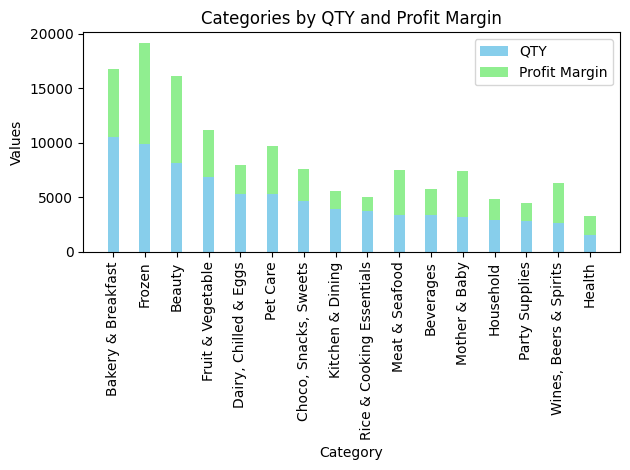

In [65]:
# Determine the number of categories
num_categories = len(category_summary)

# Define indices for categories
index = np.arange(num_categories)

bar_width = 0.35

# Plot histogram for all categories
plt.bar(index, category_summary['QTY'], bar_width, label='QTY', color='skyblue')
plt.bar(index, category_summary['Profit Margin'], bar_width, bottom=category_summary['QTY'], label='Profit Margin', color='lightgreen')

plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Categories by QTY and Profit Margin')
plt.xticks(index, category_summary['Category'], rotation=90)  # Rotate category labels for readability
plt.legend()

plt.tight_layout()  # Improve plot layout
plt.show()



**CONCLUSION 7:** Based on the visualization, we can conclude the following:

Categories with the highest sales volume: Bakery & Breakfast, Frozen, and Beauty categories have the highest number of sales (QTY). These categories generate the most sales, indicating their popularity among customers.

High profit: The Frozen category shows high profit (Profit Margin) that significantly exceeds other categories. This suggests that products in this category are not only popular but also generate substantial profit.

Categories with high sales volume but not the highest profit: For example, the Bakery & Breakfast category has a high sales volume but relatively low profit. This may indicate a low profit margin for this category, which may require a review of pricing strategy or optimization of the assortment.

Categories with low indicators: Categories such as Health, Wines, Beers & Spirits, and Party Supplies have both low sales volume and low profit. It may be worth examining the reasons for the low demand for these categories and developing strategies to improve their performance.

Relationship between sales volume and profit: For most categories, there is a logical correlation: higher sales volume generally leads to higher total profit. However, some categories, such as Frozen, deviate from this trend, which may be a positive signal of high profitability in this category.

**Recommendations:**

Strengthen high-profit categories: Focus on the Frozen category by offering additional promotions or expanding the assortment to increase sales.

Analyze low-margin categories: Categories with high sales volume but low profit, such as Bakery & Breakfast, may require a review of pricing policies or changes in the assortment to increase margins.

Develop categories with low performance: For categories with low sales and profit, develop marketing and promotion strategies to enhance their appeal to customers.

**Question 8:** What is the relationship between price and margin by store?

Create a scatter plot for analysis:

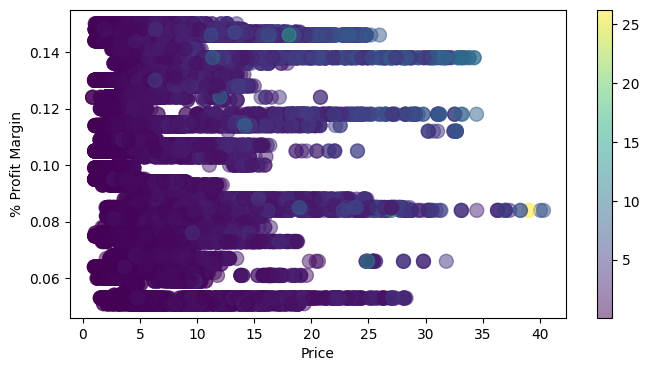

In [66]:
col_x = 'Price'
col_y = '% Profit Margin'
color_feature = 'Profit Margin'

plt.figure(figsize=(8,4))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            s=100, c=df[color_feature])
plt.xlabel(col_x)
plt.ylabel(col_y)

# Add color scale

plt.colorbar();


**CONCLUSION  8:** Analyzing the scatter plot, we can conclude that the amount of margin profit is higher at prices above 7 dollars. The majority of margin profit comes from products priced up to 10 dollars, indicating that purchases are more frequent in this price range, although the margin level can vary for the same price. For example, at a price of 5 dollars, the margin can be up to 16%. Demand analysis will also be an important indicator.

**Question 9:** Analyze the profitability by products and prioritized products. Is there a common trend? Is there seasonality in sales?

For convenience, add Month_Year field:

In [67]:
df1['Month_Year'] = df1.apply(lambda row: f"{row['Month']:02d}-{row['Year']}", axis=1)


Create a pivot table for further analysis of product profitability:

In [68]:
pivot_table5 = df1.groupby(['Category', 'Items', 'Description', '% Profit Margin', '% Product Cost', 'Month', 'Year', 'Month_Year', 'City', 'Brand', 'Price'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by='Profit Margin', ascending=False).reset_index()


Change format of some fields:

In [69]:
pivot_table5 = pivot_table5.astype({'% Profit Margin': 'float', '% Product Cost': 'float'})

pivot_table5


,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
0,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Bedok,Cascadiam Farm,13.31,29.35,140.36,195.7901,15
1,"Wines, Beers & Spirits",Bollinger Pink platted moscato rose,750 ml,0.084,0.766,12,2019,12-2019,Kuala Lumpur,Bollinger,39.04,26.23,239.24,299.8272,8
2,Frozen,Seafood canadian scallops,540 g,0.146,0.704,12,2019,12-2019,Kuala Lumpur,Catch Seafood,22.15,25.87,124.75,168.3400,8
3,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,3,2019,03-2019,Bedok,Cascadiam Farm,13.31,21.52,102.92,142.8163,11
4,Mother & Baby,Dumex baby milk formula,840 g,0.138,0.712,12,2017,12-2017,Jakarta,Dumex,27.01,18.64,96.16,132.3490,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44148,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,4,2017,04-2017,Bedok,Morton,1.15,0.07,0.90,1.0925,1
44149,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,12,2018,12-2018,Manila,Lee Kum Kee,1.06,0.07,0.83,1.0176,1
44150,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,1,2019,01-2019,Jakarta,Lee Kum Kee,1.06,0.07,0.83,1.0070,1
44151,"Choco, Snacks, Sweets",Mentos Mint Bag 50s Chewy Deagees,160 g,0.060,0.790,3,2019,03-2019,Jakarta,Mentos,1.23,0.07,0.97,1.1931,1


Profit margin and costs by periods:

In [70]:
pivot_table6 = df1.groupby(['Month_Year', 'Month', 'Year'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum()
pivot_table6 = pivot_table6.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index()

pivot_table6


,Month_Year,Month,Year,Profit Margin,Product Cost,Amount,QTY
0,01-2016,1,2016,955.79,6843.70,8894.5104,1220
1,02-2016,2,2016,959.64,6772.02,8814.0834,1237
2,03-2016,3,2016,919.11,6587.51,8560.6094,1206
3,04-2016,4,2016,1004.64,6948.53,9073.3672,1274
4,05-2016,5,2016,995.52,7096.98,9226.8476,1287
5,06-2016,6,2016,1026.14,7256.19,9446.1532,1271
6,07-2016,7,2016,977.36,7002.53,9119.1095,1253
7,08-2016,8,2016,1091.30,7787.80,10139.9460,1411
8,09-2016,9,2016,1057.66,7673.19,9972.7338,1321
9,10-2016,10,2016,1057.72,7610.99,9911.1945,1298


Merge tables by 'Category':

In [71]:
pivot_table7 = pd.merge(pivot_table5, categories_80_percent[['Category']], on='Category', how='inner')

pivot_table7['Category'].value_counts()

,count
Category,
Bakery & Breakfast,6349
Frozen,5666
Beauty,5182
Fruit & Vegetable,3539
"Choco, Snacks, Sweets",2447
Meat & Seafood,2136
Pet Care,2085
Mother & Baby,2058
"Wines, Beers & Spirits",1157


Sample of prioritized products:

In [72]:
pivot_table7

,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
0,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Bedok,Cascadiam Farm,13.31,29.35,140.36,195.7901,15
1,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,3,2019,03-2019,Bedok,Cascadiam Farm,13.31,21.52,102.92,142.8163,11
2,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2019,12-2019,Jakarta,Cascadiam Farm,13.31,17.61,84.21,113.8005,9
3,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,2,2017,02-2017,Bedok,Cascadiam Farm,13.31,15.66,74.86,102.7532,8
4,Fruit & Vegetable,Cascadian farm organic strawberries,1 Kg,0.147,0.703,12,2018,12-2018,Jakarta,Cascadiam Farm,13.31,15.65,74.85,103.0194,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30614,Bakery & Breakfast,Chocolate bread,114g,0.075,0.775,10,2016,10-2016,Jakarta,RedMart,1.09,0.08,0.84,1.0355,1
30615,Bakery & Breakfast,Hokkaido Milk Toast Bread,845g,0.075,0.775,11,2016,11-2016,Manila,Gardenia,1.03,0.08,0.80,1.0197,1
30616,Bakery & Breakfast,California raisin loaf,738g,0.075,0.775,6,2017,06-2017,Kuala Lumpur,Krispllos,1.05,0.08,0.81,1.0185,1
30617,Bakery & Breakfast,California raisin loaf,738g,0.075,0.775,2,2018,02-2018,Kuala Lumpur,Krispllos,1.05,0.08,0.81,0.9975,1


Profit margin and costs by periods for prioritized products:

In [73]:
pivot_prioritet = pivot_table7.groupby(['Month_Year', 'Month', 'Year'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum()
pivot_prioritet = pivot_prioritet.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index()

pivot_prioritet

,Month_Year,Month,Year,Profit Margin,Product Cost,Amount,QTY
0,01-2016,1,2016,749.66,5008.85,6569.9606,853
1,02-2016,2,2016,757.16,5017.12,6581.3136,891
2,03-2016,3,2016,717.62,4804.36,6294.6241,840
3,04-2016,4,2016,810.12,5302.52,6972.1938,922
4,05-2016,5,2016,780.30,5264.98,6897.5373,918
5,06-2016,6,2016,809.30,5414.65,7097.2203,910
6,07-2016,7,2016,780.02,5246.26,6887.5924,924
7,08-2016,8,2016,839.01,5524.90,7270.9338,973
8,09-2016,9,2016,845.97,5827.14,7622.8532,928
9,10-2016,10,2016,816.48,5443.28,7154.6023,878


Combine tables:

In [74]:
combined_df = pd.merge(pivot_prioritet, pivot_table6, on='Month_Year', suffixes=('_prioritet', '_6'))

Create the visualization:

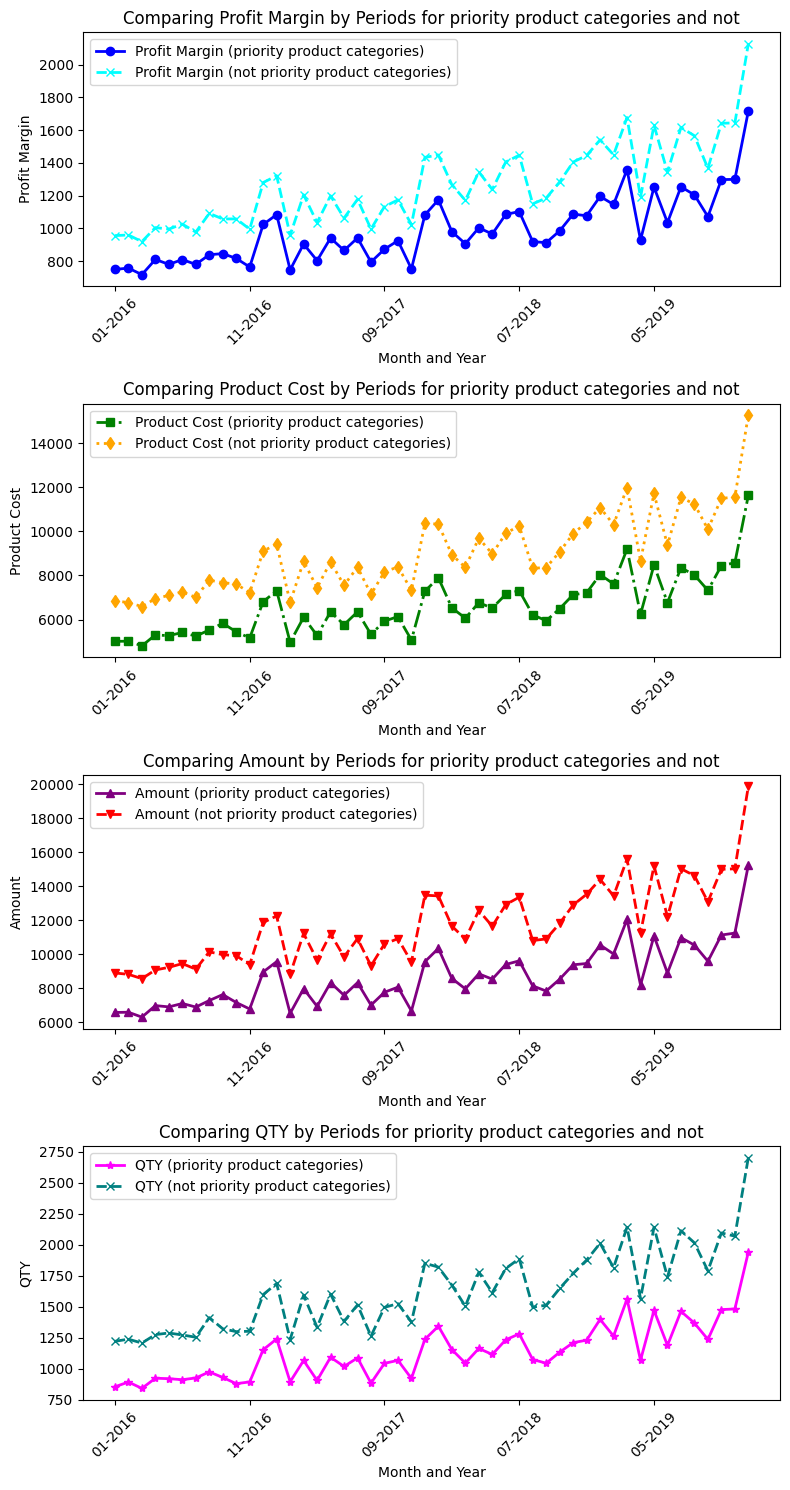

In [75]:
# Plot graphs
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(8, 15))

# First graph for Profit Margin
combined_df.plot(x='Month_Year', y='Profit Margin_prioritet', kind='line', ax=ax1, color='blue', linewidth=2, marker='o', linestyle='-', label='Profit Margin (priority product categories)')
combined_df.plot(x='Month_Year', y='Profit Margin_6', kind='line', ax=ax1, color='cyan', linewidth=2, marker='x', linestyle='--', label='Profit Margin (not priority product categories)')
ax1.set_title('Comparing Profit Margin by Periods for priority product categories and not')
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Profit Margin')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Second graph for Product Cost
combined_df.plot(x='Month_Year', y='Product Cost_prioritet', kind='line', ax=ax2, color='green', linewidth=2, marker='s', linestyle='-.', label='Product Cost (priority product categories)')
combined_df.plot(x='Month_Year', y='Product Cost_6', kind='line', ax=ax2, color='orange', linewidth=2, marker='d', linestyle=':', label='Product Cost (not priority product categories)')
ax2.set_title('Comparing Product Cost by Periods for priority product categories and not')
ax2.set_xlabel('Month and Year')
ax2.set_ylabel('Product Cost')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Third graph for Amount
combined_df.plot(x='Month_Year', y='Amount_prioritet', kind='line', ax=ax3, color='purple', linewidth=2, marker='^', linestyle='-', label='Amount (priority product categories)')
combined_df.plot(x='Month_Year', y='Amount_6', kind='line', ax=ax3, color='red', linewidth=2, marker='v', linestyle='--', label='Amount (not priority product categories)')
ax3.set_title('Comparing Amount by Periods for priority product categories and not')
ax3.set_xlabel('Month and Year')
ax3.set_ylabel('Amount')
ax3.legend()
ax3.tick_params(axis='x', rotation=45)

# Fourth graph for QTY
combined_df.plot(x='Month_Year', y='QTY_prioritet', kind='line', ax=ax4, color='magenta', linewidth=2, marker='*', linestyle='-', label='QTY (priority product categories)')
combined_df.plot(x='Month_Year', y='QTY_6', kind='line', ax=ax4, color='teal', linewidth=2, marker='x', linestyle='--', label='QTY (not priority product categories)')
ax4.set_title('Comparing QTY by Periods for priority product categories and not')
ax4.set_xlabel('Month and Year')
ax4.set_ylabel('QTY')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Profit margin and costs by periods:

In [76]:
# Filter data for 2019

pivot_table6_2019 = pivot_table6[pivot_table6['Year'] == 2019]

# Sort data for 2019 by Month

pivot_table6_2019 = pivot_table6_2019.sort_values(by='Month', ascending=True).reset_index(drop=True)

# Result

print(pivot_table6_2019)

   Month_Year  Month  Year  Profit Margin  Product Cost      Amount   QTY
0     01-2019      1  2019        1540.45      11081.37  14406.2642  2011
1     02-2019      2  2019        1448.89      10307.53  13438.1795  1815
2     03-2019      3  2019        1676.72      11990.44  15600.5177  2142
3     04-2019      4  2019        1189.75       8657.81  11245.5229  1565
4     05-2019      5  2019        1630.25      11722.28  15209.3634  2140
5     06-2019      6  2019        1343.01       9375.06  12209.2970  1739
6     07-2019      7  2019        1616.31      11541.10  15035.3638  2113
7     08-2019      8  2019        1565.65      11241.78  14626.0124  2015
8     09-2019      9  2019        1366.59      10096.19  13084.8950  1789
9     10-2019     10  2019        1641.95      11501.09  15000.1941  2095
10    11-2019     11  2019        1643.93      11552.35  15031.4609  2069
11    12-2019     12  2019        2126.81      15278.00  19886.9592  2703


Create the visualization:

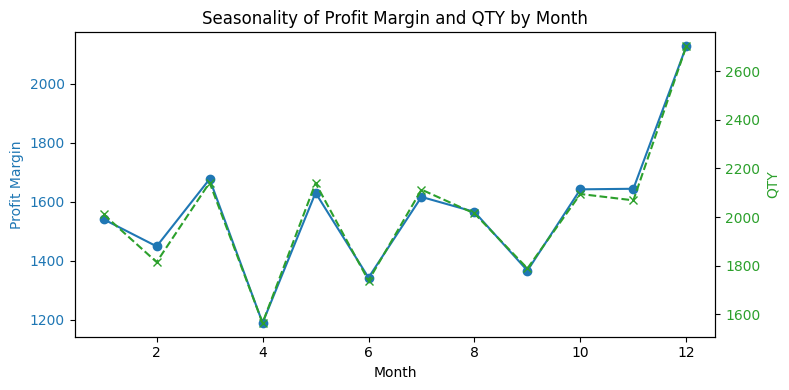

In [77]:
# Plot graphs
fig, ax1 = plt.subplots(figsize=(8, 4))

# Graph for Profit Margin
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Profit Margin', color=color)
ax1.plot(pivot_table6_2019['Month'], pivot_table6_2019['Profit Margin'], color=color, marker='o', linestyle='-', label='Profit Margin')
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis object for QTY graph
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('QTY', color=color)
ax2.plot(pivot_table6_2019['Month'], pivot_table6_2019['QTY'], color=color, marker='x', linestyle='--', label='QTY')
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Seasonality of Profit Margin and QTY by Month')

# Legends
fig.tight_layout()
plt.show()

**CONCLUSION 9:** We selected prioritized products from the overall product base to analyze the general trend. The visualizations show that the sales, margin, and cost dynamics for all products and prioritized products exhibit similar patterns. Sales and revenues are uneven, but the overall trend shows growth. Seasonality is noticeable at the end and beginning of the year, likely related to New Year's holidays. A significant increase is observed at the end of 2019. Therefore, it is recommended to stock up before the New Year's holidays to meet demand. Monthly analysis for 2019 shows a decrease in sales every 2 months, followed by an increase.

**Recommendations:** Investigate the decline every 2 months—whether it is due to external factors or internal issues such as lack of prioritized products, poor logistics and planning, insufficient staff, or other factors. Identifying the causes of reduced sales and profits can help address these issues and positively impact sales and profits.

**Question 10:** Which products should be removed from circulation?

Merge tables by Category using left join:

In [78]:
merged_table1 = pd.merge(pivot_table5, categories_80_percent[['Category']], on='Category', how='left', indicator=True)

Select only those records present in pivot_table5 but missing in categories_80_percent:

In [79]:
pivot_table9 = merged_table1[merged_table1['_merge'] == 'left_only']

Drop '_merge' column if no longer needed:

In [80]:
non_prioritet = pivot_table9.drop(columns=['_merge'])

# Check result

non_prioritet


,Category,Items,Description,% Profit Margin,% Product Cost,Month,Year,Month_Year,City,Brand,Price,Profit Margin,Product Cost,Amount,QTY
6,Health,H-two-O original isotonic dring-case,380 ml,0.084,0.766,12,2016,12-2016,Woodlands,H-two-O,26.96,18.12,165.21,211.3664,8
32,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,12,2018,12-2018,Bedok,Yakult,11.78,14.62,155.60,195.7836,17
79,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,3,2016,03-2016,Manila,Yakult,11.78,11.18,119.01,148.5458,13
108,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,10,2016,10-2016,Jakarta,Yakult,11.78,10.32,109.85,138.0616,12
109,"Dairy, Chilled & Eggs",Fresh Soyamilk,2 L,0.073,0.777,7,2019,07-2019,Kuala Lumpur,Yakult,11.78,10.32,109.84,137.8260,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44145,Rice & Cooking Essentials,Saxa Sea salt,480 g,0.064,0.786,3,2019,03-2019,Manila,Saxa,1.22,0.08,0.96,1.2078,1
44147,Rice & Cooking Essentials,Saxa Sea salt,480 g,0.064,0.786,9,2018,09-2018,Jakarta,Saxa,1.22,0.08,0.96,1.1834,1
44148,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,4,2017,04-2017,Bedok,Morton,1.15,0.07,0.90,1.0925,1
44149,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,0.064,0.786,12,2018,12-2018,Manila,Lee Kum Kee,1.06,0.07,0.83,1.0176,1


Sort the sample in ascending order:

In [81]:
non_prioritet_sort = non_prioritet.groupby(['Category', 'Items', 'Description', '% Profit Margin', '% Product Cost'])[['Profit Margin', 'Product Cost', 'Amount', 'QTY']].sum().sort_values(by = 'Profit Margin', ascending = True).reset_index()


Filter records where Profit Margin is less than 100:

In [82]:
filtered_non_prioritet = non_prioritet_sort[non_prioritet_sort['Profit Margin'] < 100]

filtered_non_prioritet

,Category,Items,Description,% Profit Margin,% Product Cost,Profit Margin,Product Cost,Amount,QTY
0,Rice & Cooking Essentials,Morton Fine salt,280 g,0.064,0.786,0.07,0.90,1.0925,1
1,Household,Colorox Wiper dry sheet value pack,870 ml,0.053,0.797,0.08,1.21,1.4440,1
2,Rice & Cooking Essentials,Morton Fine salt,310 g,0.064,0.786,0.09,1.11,1.3395,1
3,Household,Arm & Hammer Fridge N Freezer baking soda,360 ml,0.053,0.797,0.09,1.42,1.7088,1
4,Household,Colorox Wiper dry sheet value pack,800 ml,0.053,0.797,0.09,1.43,1.7005,1
...,...,...,...,...,...,...,...,...,...
4556,Health,Monster Ultra violet energy drink,320 ml,0.084,0.766,19.25,175.52,223.3920,8
4557,Beverages,3 in 1 cereal drink original,560 g,0.082,0.768,20.03,187.42,235.1142,23
4558,Beverages,3 in 1 cereal drink original,800 g,0.082,0.768,21.66,202.67,256.2666,20
4559,Beverages,3 in 1 cereal drink original,680 g,0.082,0.768,25.07,234.61,295.3164,25


**CONCLUSION 10:** The tables non_prioritet and non_prioritet_sort list products that are not prioritized, as they do not fall into the groups that provide 80% of the margin. The table filtered_non_prioritet includes products with margins below 100 dollars over all 4 years. Both groups of products need further work. First, analyze whether these products are new; if they are new, conduct a promotional campaign. If they are not new and have margins below 100 dollars, consider clearance and removal from circulation. For other non-priority products, further analysis is needed to determine if some should also be removed if the promotional campaign does not pay off. After reviewing the assortment, consider replacing some products with more in-demand ones. Additionally, if non-priority products have low demand but low margins due to low prices or high costs, these indicators need further analysis.

**Question 11:** Is there a difference in margin profit for the same product in different cities?

Group by Category, Items, Description, and calculate mean and standard deviation:

In [83]:
grouped_data = pivot_table5.groupby(['Category', 'Items', 'Description', 'Brand'])[['% Profit Margin', '% Product Cost']].agg(['mean', 'std'])

Reset index to obtain a simple DataFrame:


In [84]:
grouped_data.columns = ['% Profit Margin Mean', '% Profit Margin Std', '% Product Cost Mean', '% Product Cost Std']
grouped_data = grouped_data.reset_index()

Merge statistics into one table:

In [85]:
merged_data = pd.merge(pivot_table5, grouped_data, on=['Category', 'Items', 'Description', 'Brand'], how='left')

Calculate deviation from the mean:

In [86]:
merged_data['% Profit Margin Difference'] = merged_data['% Profit Margin'] - merged_data['% Profit Margin Mean']

merged_data['% Product Cost Difference'] = merged_data['% Product Cost'] - merged_data['% Product Cost Mean']

Check for significant deviations:

In [87]:
merged_data['Significant % Profit Margin Difference'] = abs(merged_data['% Profit Margin Difference']) > 0.01

merged_data['Significant % Product Cost Difference'] = abs(merged_data['% Product Cost Difference']) > 0.01

Filter rows where both indicators are significant:


In [88]:
filtered_data = merged_data[(merged_data['Significant % Profit Margin Difference']) & (merged_data['Significant % Product Cost Difference'])]

Summary of filtered data:

In [89]:
filtered_data1 = filtered_data[['Category', 'Items', 'Description', 'Brand', 'City', '% Profit Margin', '% Product Cost',
                     '% Profit Margin Difference', '% Product Cost Difference', '% Profit Margin Mean', '% Product Cost Mean', 'Significant % Profit Margin Difference', 'Significant % Product Cost Difference']]
filtered_data1



,Category,Items,Description,Brand,City,% Profit Margin,% Product Cost,% Profit Margin Difference,% Product Cost Difference,% Profit Margin Mean,% Product Cost Mean,Significant % Profit Margin Difference,Significant % Product Cost Difference
9395,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Woodlands,0.144,0.706,0.05175,-0.05175,0.09225,0.75775,True,True
9925,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Bedok,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True
28070,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Kuala Lumpur,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True
28072,Bakery & Breakfast,Jumbo 600 Enriched White Bread,825 g,Sunshine,Manila,0.075,0.775,-0.01725,0.01725,0.09225,0.75775,True,True


In [90]:
filtered_data1.shape

print(f'The dataset contains {filtered_data1.shape[0]} records.')

The dataset contains 4 records.


**CONCLUSION 11:** There is a list of products with differences in '% Profit Margin' and '% Product Cost' across different cities. The table filtered_data1 shows 4 records, which is relatively few compared to the overall product volume. Analyze the need for price differentiation to adjust margins by city; there may be more tourist cities or locations where prices can be increased. Alternatively, consider relocating stores to more touristy areas to increase sales and prices. It is also worth exploring if there is an option to reduce the % cost in any city.

**Question 12:** Is it worthwhile to open an online store? Analyze whether cash or card payments are used more frequently.

Display the proportion of payments by payment types:

In [91]:
Payments = df1['Payment Mode'].value_counts(normalize=True).reset_index()
Payments

,Payment Mode,proportion
0,Card,0.339948
1,Wallet,0.334358
2,Cash,0.325695


Display information about fields - name and types:

In [92]:
print(Payments.columns)


Index(['Payment Mode', 'proportion'], dtype='object')


For convenience, change data types for some fields:

In [93]:
Payments['proportion'] = Payments['proportion'].astype('float')

Display minimum value:

In [94]:
min_proportion = Payments['proportion'].min()

print(min_proportion)

0.32569480236292275


Find the row with the minimum proportion value:

In [95]:
min_proportion_row = Payments[Payments['proportion'] == min_proportion]

Find the Payment Mode value for this row:

In [96]:
min_quantity_item = min_proportion_row['Payment Mode'].values[0]

print(min_quantity_item)

Cash


Let's create a pivot table:

In [97]:
Payments1 = df1.groupby('Payment Mode')['Amount'].sum().sort_values(ascending=True).reset_index()

Calculate the sum for the 'Amount' field:

In [98]:
total_amount = df1['Amount'].sum()

Calculate the share of each payment method:

In [99]:
Payments1['Amount Share'] = Payments1['Amount'] / total_amount

# Check the result
print(Payments1)

  Payment Mode      Amount  Amount Share
0         Cash  179878.633      0.319281
1       Wallet  188853.860      0.335212
2         Card  194653.751      0.345507


In [100]:
min_payment_mode = Payments1.iloc[0]['Payment Mode']

print(f'Conclusion: The smallest number of payments is for {min_quantity_item} and the smallest amount is for {min_payment_mode}.')

Conclusion: The smallest number of payments is for Cash and the smallest amount is for Cash.


For better visualization, create a pie chart:

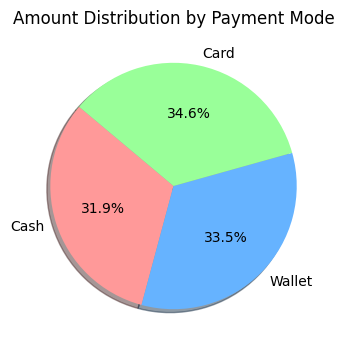

In [101]:
Payments1.plot.pie(y = 'Amount', labels = Payments1['Payment Mode'], colors=['#ff9999', '#66b3ff', '#99ff99'],
                      autopct = '%1.1f%%',shadow=True, startangle = 140,
                      legend = False, figsize = (4, 4))


plt.title('Amount Distribution by Payment Mode')
plt.ylabel('')  # remove Y axis label
plt.show()

**CONCLUSION 12:** Given the lower number of cash payments and lower amounts for cash transactions, it is advisable to open an online store. People more frequently use cards and digital wallets, indicating they would also find online ordering convenient.





**Question 13:** How is pricing structured? Is there a price difference for the same product?

Analyze the year 2019:

In [102]:
pivot_table5_2019 = pivot_table5[pivot_table5['Year'] == 2019]

Group by Category, Items, Description and calculate the average:

In [103]:
pivot_table11 = pivot_table5_2019.groupby(['Category', 'Items', 'Description', 'Brand'])['Price'].agg(['mean']).reset_index()

Rename fields:

In [104]:
pivot_table11.columns = ['Category', 'Items', 'Description', 'Brand', 'Price Mean']

Merge statistics into one table:


In [105]:
merged_pivot11 = pd.merge(pivot_table5_2019, pivot_table11, on=['Category', 'Items', 'Description', 'Brand'], how='left')

Calculate deviation from the mean:

In [106]:
merged_pivot11['Price Difference'] = merged_pivot11['Price'] - merged_pivot11['Price Mean']

Check for significant deviations:

In [107]:
merged_pivot11['Significant Price Difference'] = abs(merged_pivot11['Price Difference']) == 0

Filter rows where the price difference is significant:

In [108]:
filtered_for_price = merged_pivot11[(merged_pivot11['Significant Price Difference'])]

Summary of filtered data:

In [109]:
filtered_for_price1 = filtered_for_price[['Category', 'Items', 'Description', 'Brand', 'City', 'Price', '% Profit Margin', '% Product Cost', 'Price Mean', 'Significant Price Difference']]
filtered_for_price1

,Category,Items,Description,Brand,City,Price,% Profit Margin,% Product Cost,Price Mean,Significant Price Difference
1,"Wines, Beers & Spirits",Bollinger Pink platted moscato rose,750 ml,Bollinger,Kuala Lumpur,39.04,0.084,0.766,39.04,True
2,Frozen,Seafood canadian scallops,540 g,Catch Seafood,Kuala Lumpur,22.15,0.146,0.704,22.15,True
4,Frozen,Seafood canadian scallops,350 g,Suhyup,Kuala Lumpur,15.81,0.146,0.704,15.81,True
5,"Wines, Beers & Spirits",Ashai Lager Beer,480 ml,Ashai,Jakarta,11.60,0.118,0.732,11.60,True
6,"Wines, Beers & Spirits",Ashai Lager Beer,480 ml,Ashai,Manila,11.60,0.118,0.732,11.60,True
...,...,...,...,...,...,...,...,...,...,...
13337,Bakery & Breakfast,Hokkaido Milk Toast Bread,845g,Gardenia,Jakarta,1.03,0.075,0.775,1.03,True
13338,"Choco, Snacks, Sweets",Eclipse Sugarfree peppermint Mints,350 g,Eclipse,Jakarta,1.32,0.060,0.790,1.32,True
13339,Rice & Cooking Essentials,Saxa Sea salt,480 g,Saxa,Manila,1.22,0.064,0.786,1.22,True
13340,Rice & Cooking Essentials,Lee Kum Kee Cooking sea salt,210 g,Lee Kum Kee,Jakarta,1.06,0.064,0.786,1.06,True


In [110]:
print(f'The filtered_for_price1 table contains {filtered_for_price1.shape[0]} records.')

The filtered_for_price1 table contains 12739 records.


In [111]:
print(f'The pivot_table5_2019 table contains {pivot_table5_2019.shape[0]} records.')

The pivot_table5_2019 table contains 13342 records.


Calculate the percentage of the 2019 sales base where prices were the same in different cities for the same product:

In [112]:
percent_price = (filtered_for_price1.shape[0] / pivot_table5_2019.shape[0]) * 100

percent_price = round(percent_price, 2)

print(f'The pivot_table5_2019 table contains {percent_price} percent of data where the price is the same in different cities for the same product.')


The pivot_table5_2019 table contains 95.48 percent of data where the price is the same in different cities for the same product.


**CONCLUSION 13:** In the sales data for 2019, 95.48% of the same products in different cities have the same price. Analyze whether we can increase prices in any city and how to do so to further increase margins. Compare our store prices with those of other stores in the same cities to ensure our prices are not too low. It is possible that our company's policy includes a pricing strategy where prices are almost identical with evenly distributed costs among products. The analysis in Question 10 showed that % margin and % cost are nearly the same for the same product. Most likely, the margin amount changes according to the quantity of products purchased and discounts, rather than due to price differences.

**Question 14:** Can we identify regular customers?

Group data by Membership ID:

In [113]:
regular_customers = df1['Membership ID'].value_counts().sort_values(ascending=False).reset_index()

Select the top 35 customers:

In [114]:
regular_customers_35 = regular_customers.head(35)
regular_customers_35


,Membership ID,count
0,MIDPH0241,108
1,MIDPH0036,96
2,MIDPH0028,94
3,MIDPH0106,93
4,MIDPH0015,91
5,MIDPH0133,84
6,MIDMY0302,82
7,MIDMY0359,81
8,MIDMY0143,81
9,MIDMY0102,80


Create a base for the year 2019 only:

In [115]:
df1_2019 = df1[df1['Year'] == 2019]

Merge two tables by Membership ID:

In [116]:
pivot_table12 = pd.merge(df1_2019, regular_customers_35[['Membership ID']], on='Membership ID', how='inner')
pivot_table12

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Amount_check,GrossBillAmount1,GrossBillAmount_check,NetBillAmount1,NetBillAmount_check,GrossBillAmount2,Date_time,Hour,Time_of_Day,Month_Year
0,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,43,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
1,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,44,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
2,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,44,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
3,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,45,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
4,GIJ01675,2019-01-02,2019,1,19:56:13.565000,9813077051,MIDID0046,46,18,Female,...,0.0,66.908160,0.0,60.8256,-7.105427e-15,66.908160,2019-01-02 19:56:13.565,19,evening,01-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,GSW01512,2019-12-11,2019,12,14:32:44.027000,9924527557,MIDSG0838,89,24,Male,...,0.0,92.947904,0.0,86.8672,0.000000e+00,92.947904,2019-12-11 14:32:44.027,14,afternoon,12-2019
817,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,68,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019
818,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,69,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019
819,GSW01518,2019-12-20,2019,12,16:39:07.475000,9866859186,MIDSG0188,70,29,Female,...,0.0,54.873024,0.0,35.5968,-1.568640e+01,38.088576,2019-12-20 16:39:07.475,16,afternoon,12-2019


Group by Gender and sum by Amount:


In [117]:
gender_35 = pivot_table12.groupby(['Gender'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()

Calculate total Amount:

In [118]:
total_amount = gender_35['Amount'].sum()

Add Percentage column:

In [119]:
gender_35['Percentage'] = (gender_35['Amount'] / total_amount) * 100

Round percentages:

In [120]:
gender_35['Percentage'] = gender_35['Percentage'].round(2)

print(gender_35)

   Gender     Amount  Percentage
0  Female  5711.8152       64.12
1    Male  3195.9682       35.88


Gender that buys the most:

In [121]:
gender_35_max = gender_35.iloc[0]['Gender']

Gender that buys the second most:

In [122]:
gender_35_min = gender_35.iloc[1]['Gender']
gender_35_min

'Male'

How much more one gender buys compared to another among regular customers:

In [123]:
Percentage_calc = (((gender_35.iloc[0]['Percentage'] - gender_35.iloc[1]['Percentage'])/gender_35.iloc[1]['Percentage'])*100).round(2)

Determine the age of regular customers:

In [124]:
age_35 = pivot_table12.groupby(['Age'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()

age_35

,Age,Amount
0,26,822.8151
1,24,664.4966
2,20,611.0005
3,19,605.4966
4,51,600.4263
5,25,535.8560
6,38,531.2432
7,17,487.8576
8,45,449.0988
9,50,432.8244


**CONCLUSION 14:**

In [125]:
print(f'CONCLUSION 14: When analyzing regular customers, we see that {gender_35_max} buys more frequently. Among regular customers, {gender_35_max} purchases more often than {gender_35_min} by {Percentage_calc} percent. Regular customers are predominantly young and middle-aged, with no retirees. This suggests that women may make unplanned purchases, so it is worth reviewing which products they buy more frequently and focusing on those. Additionally, the fact that regular customers are not retired indicates that this demographic has higher purchasing power, making it appropriate to expand the product range.')

CONCLUSION 14: When analyzing regular customers, we see that Female buys more frequently. Among regular customers, Female purchases more often than Male by 78.71 percent. Regular customers are predominantly young and middle-aged, with no retirees. This suggests that women may make unplanned purchases, so it is worth reviewing which products they buy more frequently and focusing on those. Additionally, the fact that regular customers are not retired indicates that this demographic has higher purchasing power, making it appropriate to expand the product range.


**Question 15:** What is the average check?

In [126]:
check = df1.groupby(['Receipt Number'])[['Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()
check

,Receipt Number,Amount
0,GMK02821,527.6680
1,GMK02820,508.6848
2,GSW01526,494.1471
3,GMK02819,488.6739
4,GSW00269,449.7220
...,...,...
13043,GMK01466,1.0282
13044,GIJ00195,1.0176
13045,GMK01641,1.0098
13046,GSW01115,0.9999


In [127]:
check_mean = check['Amount'].mean().round(2)

print(f'Середній чек: {check_mean}')


Середній чек: 43.18


**CONCLUSION 15:** The average check is $43.18.

Download df1 in Excel for further work Tableau:

In [128]:
# Download df1 in Excel
df1.to_excel('df1.xlsx', index=False)

# Downloading a file to the computer
from google.colab import files
files.download('df1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Below are the main metrics and their analysis in Tableau:

[Metrics](https://docs.google.com/document/d/1bjH4Fy8b_RgdwwupBgopsu467eQyoGL9QV5Oor1l2WY/edit)

[Tableаu](https://public.tableau.com/app/profile/tera.aga/viz/FinalProject_17234451743350/Grocerystoresalesanalysis#1)

Below is project ["Grocery store sales analysis_UKR.ipynb"](https://colab.research.google.com/drive/1Nn1nqUXbEoB6eDpAS_5mOQlTebF4AtKi?authuser=1#scrollTo=Gh7uKmojEM4Z) in Ukrainian in colab.